## Image generation code below was modified from Jeff Heatons' [original source](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_07_3_style_gan.ipynb).

## Model generation

### Clone https://github.com/NVlabs/stylegan.git

In [1]:
# Copyright (c) 2019, NVIDIA CORPORATION. All rights reserved.
#
# This work is licensed under the Creative Commons Attribution-NonCommercial
# 4.0 International License. To view a copy of this license, visit
# http://creativecommons.org/licenses/by-nc/4.0/ or send a letter to
# Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config
import matplotlib.pyplot as plt

# Initialize TensorFlow.
tflib.init_tf()
# Load pre-trained network.
url = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' # karras2019stylegan-ffhq-1024x1024.pkl
with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
    _G, _D, Gs = pickle.load(f)
    # _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
    # _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
    # Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.
Gs.print_layers() # Print network details.


Gs                              Params    OutputShape          WeightShape     
---                             ---       ---                  ---             
latents_in                      -         (?, 512)             -               
labels_in                       -         (?, 0)               -               
lod                             -         ()                   -               
dlatent_avg                     -         (512,)               -               
G_mapping/latents_in            -         (?, 512)             -               
G_mapping/labels_in             -         (?, 0)               -               
G_mapping/PixelNorm             -         (?, 512)             -               
G_mapping/Dense0                262656    (?, 512)             (512, 512)      
G_mapping/Dense1                262656    (?, 512)             (512, 512)      
G_mapping/Dense2                262656    (?, 512)             (512, 512)      
G_mapping/Dense3                262656 

## Fake face Image generation

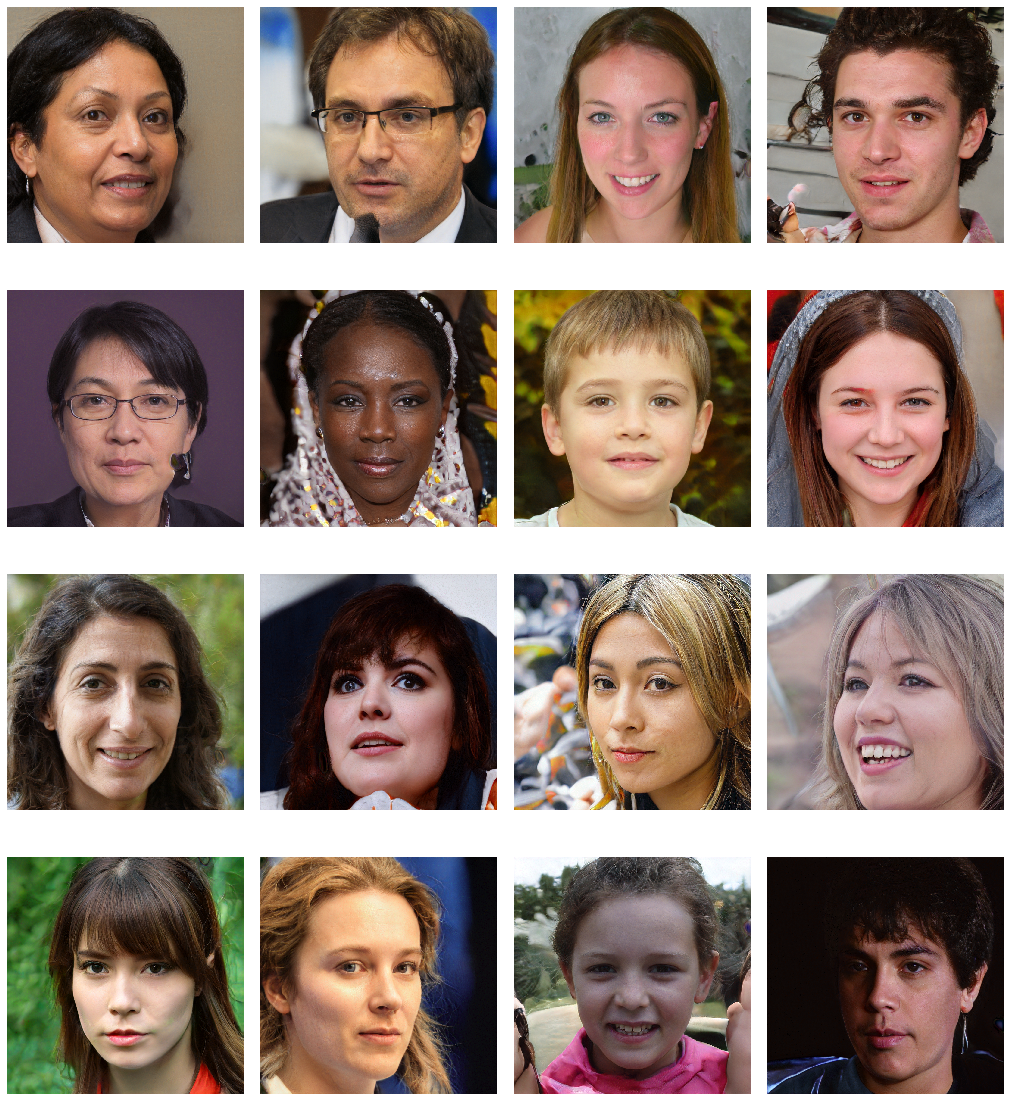

In [2]:
rows,cols = 4,4
fig,axes = plt.subplots(rows,cols,figsize=(20,20))
for i in range(rows):
    for j in range(cols):
        # Pick latent vector.
        rnd = np.random.RandomState()
        latents = rnd.randn(1, Gs.input_shape[1])
        # Generate image.
        fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
        images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
        axes[i,j].imshow(images[0])
        axes[i,j].axis('off')
plt.subplots_adjust(hspace=0.2,left=0.2, wspace=0.02)
## create results folder to store
fig.savefig('results/face_gen_example.png')